In [1]:
# Check environment
import sys

print(sys.version) ## version de python 
print(sys.path)
print("---")
print(sys.executable) ## Indica que archivo se está utilizando para ejecutar pyhton 
                      ##compruebo que se está ejecutando en el entorno correcto

3.8.20 (default, Oct  3 2024, 10:25:41) 
[Clang 14.0.6 ]
['/opt/miniconda3/envs/aa_proyecto1/lib/python38.zip', '/opt/miniconda3/envs/aa_proyecto1/lib/python3.8', '/opt/miniconda3/envs/aa_proyecto1/lib/python3.8/lib-dynload', '', '/opt/miniconda3/envs/aa_proyecto1/lib/python3.8/site-packages', '/opt/miniconda3/envs/aa_proyecto1/lib/python3.8/site-packages/setuptools/_vendor']
---
/opt/miniconda3/envs/aa_proyecto1/bin/python


In [2]:
# primero todas las librerías por bloques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# opciones de visualización
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
### Lectura datasets
df1 = pd.read_csv('./data/Loan_test_set.csv', skiprows=[0])
df2 = pd.read_csv('./data/Loan_training_set_1_4.csv', skiprows=[0])
df3 = pd.read_csv('./data/Loan_training_set_2_4.csv', skiprows=[0])
df4 = pd.read_csv('./data/Loan_training_set_3_4.csv', skiprows=[0])
df5 = pd.read_csv('./data/Loan_training_set_4_4.csv', skiprows=[0])

In [5]:
# Tendré que juntarlo pero separando training y test
df1['test_set'] = 1
df2['test_set'] = 0
df3['test_set'] = 0
df4['test_set'] = 0
df5['test_set'] = 0

# Check if all the datasets have same column 

In [ ]:
## dstack  combina los vectores en una matrix, siempre añade una tercera dimensión
# filas con el nombre de cada coln de cada vector 
# y columnas = número de vectores iniciales 
# es como si juntara los vectores columna

columns = np.dstack((list(df1.columns), list(df2.columns), list(df3.columns), list(df4.columns), list(df5.columns)))
print(columns.shape)
print(columns)

(1, 152, 5)
[[['id' 'id' 'id' 'id' 'id']
  ['member_id' 'member_id' 'member_id' 'member_id' 'member_id']
  ['loan_amnt' 'loan_amnt' 'loan_amnt' 'loan_amnt' 'loan_amnt']
  ['funded_amnt' 'funded_amnt' 'funded_amnt' 'funded_amnt' 'funded_amnt']
  ['funded_amnt_inv' 'funded_amnt_inv' 'funded_amnt_inv'
   'funded_amnt_inv' 'funded_amnt_inv']
  ['term' 'term' 'term' 'term' 'term']
  ['int_rate' 'int_rate' 'int_rate' 'int_rate' 'int_rate']
  ['installment' 'installment' 'installment' 'installment' 'installment']
  ['grade' 'grade' 'grade' 'grade' 'grade']
  ['sub_grade' 'sub_grade' 'sub_grade' 'sub_grade' 'sub_grade']
  ['emp_title' 'emp_title' 'emp_title' 'emp_title' 'emp_title']
  ['emp_length' 'emp_length' 'emp_length' 'emp_length' 'emp_length']
  ['home_ownership' 'home_ownership' 'home_ownership' 'home_ownership'
   'home_ownership']
  ['annual_inc' 'annual_inc' 'annual_inc' 'annual_inc' 'annual_inc']
  ['verification_status' 'verification_status' 'verification_status'
   'verification_

In [ ]:
coldf = pd.DataFrame(columns[0]) ## seleccionamos la primera capa de la primera dimensión y así tengo filas y col
coldf.head()

,0,1,2,3,4
0,id,id,id,id,id
1,member_id,member_id,member_id,member_id,member_id
2,loan_amnt,loan_amnt,loan_amnt,loan_amnt,loan_amnt
3,funded_amnt,funded_amnt,funded_amnt,funded_amnt,funded_amnt
4,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv,funded_amnt_inv


In [13]:
df = pd.concat([df1, df2, df3, df4, df5])
df.shape
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,test_set
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,Project Leader,10+ years,MORTGAGE,82000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,672xx,KS,31.07,0.0,May-1996,725.0,729.0,0.0,NaN,NaN,18.0,0.0,69578.0,63.2%,31.0,w,11438.26,11438.26,3912.17,3912.17,2561.74,1350.43,0.0,0.0,0.0,Dec-2017,492.13,Jan-2018,Dec-2017,714.0,710.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,202617.0,0.0,3.0,0.0,1.0,22.0,34430.0,57.0,0.0,2.0,13686.0,61.0,110037.0,0.0,9.0,0.0,3.0,11257.0,29762.0,63.4,0.0,0.0,140.0,250.0,13.0,13.0,6.0,13.0,NaN,13.0,NaN,0.0,7.0,9.0,8.0,13.0,4.0,14.0,21.0,9.0,18.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,286204.0,104008.0,81400.0,60167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,10+ years,MORTGAGE,215000.0,Source Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,067xx,CT,6.06,0.0,Jan-2004,765.0,769.0,4.0,NaN,NaN,11.0,0.0,8678.0,18.8%,16.0,f,4190.59,4190.59,1586.64,1586.64,809.41,777.23,0.0,0.0,0.0,Dec-2017,200.10,Jan-2018,Dec-2017,779.0,775.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,44754.0,1.0,3.0,2.0,4.0,7.0,35832.0,68.0,2.0,2.0,8659.0,27.0,46200.0,2.0,0.0,6.0,6.0,4069.0,37522.0,18.8,0.0,0.0,83.0,87.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,2.0,2.0,7.0,8.0,7.0,7.0,8.0,2.0,11.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,1

In [21]:
df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()
## saco clases, ordeno, transformo en col, agrupo los valores y sumo 

,feature_type,count
0,int64,1
1,float64,111
2,object,40


In [15]:
# Analizar una variable concreta
df.loan_status.value_counts()

loan_status
Current               500937
Fully Paid            358629
Charged Off            99099
Late (31-120 days)     13203
In Grace Period         6337
Late (16-30 days)       3414
Default                   36
Name: count, dtype: int64

# Análisis de valore falatantes y duplicados

In [ ]:
#### analizar nulos
## axis = 0 para hacer suma vertical, realmente no es necesario --> convierto en vector col
## los tipos de datos los paso también a vector col 
df_dtypes = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('missing_values').reset_index(),
         df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

df_dtypes.sort_values(['missing_values', 'feature_type'], ascending=[False,True])

,index,missing_values,feature_type
151,member_id,981665,float64
150,orig_projected_additional_accrued_interest,979086,float64
137,hardship_last_payment_amount,978661,float64
138,hardship_payoff_balance_amount,978661,float64
140,hardship_dpd,978661,float64
141,hardship_length,978661,float64
144,hardship_amount,978661,float64
145,deferral_term,978661,float64
139,payment_plan_start_date,978661,object
142,hardship_end_date,978661,object


In [ ]:
## Almlacenammos los nombres de columnas con valores faltantes significativos (400.000)
## El tratamiento tendré que hacerlo yo en otro momento 

missing_df = df.isnull().sum().sort_values().to_frame('missing_value').reset_index()
## con reset_index conseguimos que los nombre de las columnas aparezcan en otro vector en vez de 
## en el índice, así conseguimos tener un df
miss_4000 = list(missing_df[missing_df.missing_value >= 400000]['index'])
print(len(miss_4000))
print(sorted(miss_4000)) ## me devuele los items de forma ascendente 

58
['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last

In [ ]:
### posibles columnas duplicadas, función para comprobarlo 

def duplicate_columns(frame):
    ## con esto creamos un diccionario con las clases y los nombres de columnas dentro 
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break

    return dups 

In [ ]:
### Comoprobamos si hay columnas duplicadas y vemos que no 
duplicate_columns(df)

[]

# Análisis de variables de fomra individual

In [ ]:
def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    df_sin_nulos = df[['loan_status', 'total_pymnt']].dropna() ## Ajuste momentáneno 

    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df_sin_nulos, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df_sin_nulos.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()


El error ValueError: cannot reindex on an axis with duplicate labels ocurre cuando una operación (como **sns.boxplot o un groupby**) intenta acceder a datos donde:

- Existen valores nulos (NaN) en las columnas involucradas.
- La estructura del DataFrame pierde consistencia por la presencia de índices duplicados o mal definidos.
- El eje de datos no puede manejar correctamente etiquetas duplicadas o mal formadas debido a los valores faltantes o datos inconsistentes.

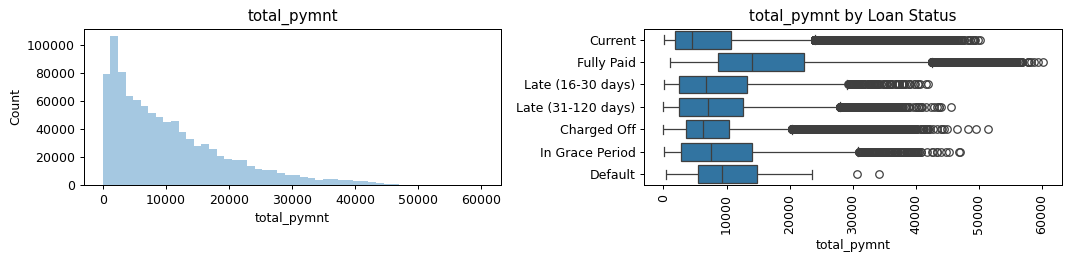

In [60]:
plot_feature('total_pymnt', True)

# Análisis de correlaciones

El análisis de correlaciones es fundamental para detectar las variables relevantes.
Por ejemplo, una variable con más de un 68% (por decir algo) de correlación con la variable target... raro, es posible, pero raro, prácticamente solo con esta variable ya aciertas el target.

### **No estudiar la correlación con variables categóricas**

In [ ]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,test_set
count,0.0,981655.000000,981655.000000,981655.000000,981655.000000,9.816550e+05,981361.000000,981655.000000,981655.000000,981655.000000,981655.000000,503935.000000,174205.000000,981655.000000,981655.000000,9.816550e+05,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,9.816550e+05,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,278704.000000,981655.0,2.572500e+04,25723.000000,981655.000000,9.816550e+05,9.816550e+05,346303.000000,346303.000000,346303.000000,346303.000000,336956.000000,3.463030e+05,300362.000000,346303.000000,346303.000000,346303.000000,346273.000000,9.816550e+05,346303.000000,346303.000000,346303.000000,981655.000000,981642.000000,971383.000000,970803.000000,981655.000000,981655.000000,953445.000000,981655.000000,981655.000000,981655.000000,981655.000000,971947.000000,249226.000000,878211.000000,350293.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981655.000000,981654.000000,981655.000000,981655.000000,939146.000000,981655.000000,981655.000000,981655.000000,981655.000000,970988.000000,981655.000000,981655.000000,9.816550e+05,9.816550e+05,9.816550e+05,9.816550e+05,21825.000000,21825.000000,21825.000000,21825.000000,21825.000000,21825.000000,21537.000000,21825.000000,21825.000000,21825.000000,21825.000000,7541.000000,3004.0,3004.000000,3004.0,3004.000000,2579.000000,3004.000000,3004.000000,8630.000000,8630.000000,8630.000000,981665.000000
mean,NaN,14963.557767,14963.557767,14958.494068,441.567492,7.766029e+04,18.878278,0.348926,694.888999,698.889131,0.595004,33.648506,69.144181,11.816029,0.230210,1.700362e+04,24.999027,5414.467766,5412.834903,10759.329230,10755.536718,8402.339152,2251.174242,9.008020e-01,104.915034,17.860589,3114.646693,687.342490,676.984434,0.019997,44.456757,1.0,1.171532e+05,18.936393,0.005909,2.532014e+02,1.421102e+05,0.903013,2.863134,0.626801,1.539759,21.321822,3.595931e+04,68.931965,1.300988,2.791010,5819.417343,58.188109,3.340459e+04,0.970200,1.451963,2.045968,4.576213,13418.176272,10139.309019,60.873200,0.010062,14.144151,127.182896,18

In [64]:
## Para seguir practicando y entendiendo el código, voy a elimar los valores faltantes del dataframe
## Más tarde lo solucionaré

df_clean_provisional = df.dropna()
corr = df_clean_provisional.corr(method = 'spearman')

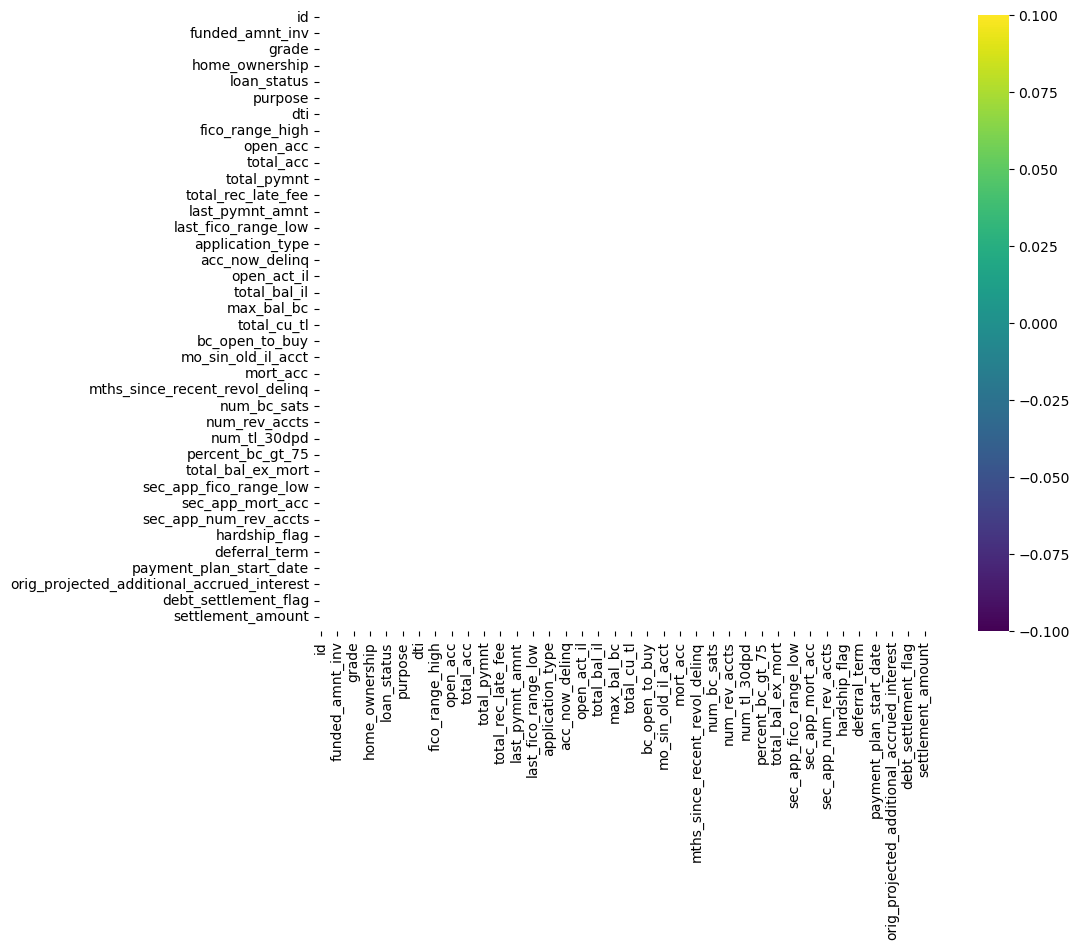

In [65]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()
